# <center>ML Basics </center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 12 tasks/questions to be completed.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 1

In this section we will analyse a dataset to look into its statistical propeties. For this we will use the DiabetesTrain.csv dataset. Each row corresponds to a single patient. The first 8 columns correspond to the features of the patients that may help predict risk of diabetes. The outcome column is a binary column represting the risk of diabetes, outcome 1 : high risk of diabetes and outcome 0 little to no risk of diabetes.

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [51]:
#TODO

diabetesData = None

# Load the diabetes dataset
DiabetesDataTrain = pd.read_csv('DiabetesTrain.csv')
DiabetesDataTest = pd.read_csv('DiabetesTest.csv')

#show the first 5 rows of the training data
print(DiabetesDataTrain.head())
print(DiabetesDataTest.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       95             74             21       73  25.9   
1            1       95             82             25      180  35.0   
2            1       90             68              8        0  24.5   
3            7      195             70             33      145  25.1   
4            0      180             66             39        0  42.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.673   36        0  
1                     0.233   43        1  
2                     1.138   36        0  
3                     0.163   55        1  
4                     1.893   25        1  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       89             66             23       94  28.1   
1            3       78             50             32       88  31.0   
2            7      147             76              0        0  39.4   
3            1 

**Q2.** Let us define the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determine the following probabilities. Pandas dataframe inbuilt functions such as count, group by, would be useful for this task.

In [52]:


# Define conditions for events
A = (DiabetesDataTrain['BMI'] < 25).sum()
B = (DiabetesDataTrain['Glucose'] > 100).sum()
C = (DiabetesDataTrain['Pregnancies'] > 2).sum()
D = (DiabetesDataTrain['Outcome'] == 1).sum()
total = len(DiabetesDataTrain)

# Compute probabilities
P_A = A / total
P_B = B / total
P_C = C / total
P_D = D / total

# Compute conditional probabilities correctly
P_A_given_D = ((DiabetesDataTrain['BMI'] < 25) & (DiabetesDataTrain['Outcome'] == 1)).sum() / D
P_B_given_D = ((DiabetesDataTrain['Glucose'] > 100) & (DiabetesDataTrain['Outcome'] == 1)).sum() / D
P_C_given_D = ((DiabetesDataTrain['Pregnancies'] > 2) & (DiabetesDataTrain['Outcome'] == 1)).sum() / D

# Compute joint probabilities
P_A_and_B = ((DiabetesDataTrain['BMI'] < 25) & (DiabetesDataTrain['Glucose'] > 100)).sum() / total
P_A_and_C = ((DiabetesDataTrain['BMI'] < 25) & (DiabetesDataTrain['Pregnancies'] > 2)).sum() / total
P_B_and_C = ((DiabetesDataTrain['Glucose'] > 100) & (DiabetesDataTrain['Pregnancies'] > 2)).sum() / total
P_A_and_D = ((DiabetesDataTrain['BMI'] < 25) & (DiabetesDataTrain['Outcome'] == 1)).sum() / total
P_B_and_D = ((DiabetesDataTrain['Glucose'] > 100) & (DiabetesDataTrain['Outcome'] == 1)).sum() / total
P_C_and_D = ((DiabetesDataTrain['Pregnancies'] > 2) & (DiabetesDataTrain['Outcome'] == 1)).sum() / total

# Print results
print(f"P(A): {P_A:.4f}")
print(f"P(B): {P_B:.4f}")
print(f"P(C): {P_C:.4f}")
print(f"P(D): {P_D:.4f}")
print(f"P(A | D): {P_A_given_D:.4f}")
print(f"P(B | D): {P_B_given_D:.4f}")
print(f"P(C | D): {P_C_given_D:.4f}")
print(f"P(A and B): {P_A_and_B:.4f}")
print(f"P(A and C): {P_A_and_C:.4f}")
print(f"P(B and C): {P_B_and_C:.4f}")
print(f"P(A and D): {P_A_and_D:.4f}")
print(f"P(B and D): {P_B_and_D:.4f}")
print(f"P(C and D): {P_C_and_D:.4f}")




Q2 = 'B'
#Since 𝑃(𝐵∣𝐷) P(B∣D) is the highest (0.9404), Glucose > 100 (B) contributes the most to high risk of diabetes.

P(A): 0.1479
P(B): 0.7368
P(C): 0.5388
P(D): 0.3784
P(A | D): 0.0199
P(B | D): 0.9404
P(C | D): 0.6689
P(A and B): 0.0827
P(A and C): 0.0652
P(B and C): 0.4311
P(A and D): 0.0075
P(B and D): 0.3559
P(C and D): 0.2531


**Q3.** Now we will compute the covariance and correlation matrices from scratch. For this do not use any inbuilt functions. Follow the steps outlined below. Each step is graded.

**Step1:** Convert the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe. Name it diabetesX.

In [53]:
#TODO

diabetesX = DiabetesDataTrain.iloc[:, :-1].values
print(diabetesX)

[[  1.     95.     74.    ...  25.9     0.673  36.   ]
 [  1.     95.     82.    ...  35.      0.233  43.   ]
 [  1.     90.     68.    ...  24.5     1.138  36.   ]
 ...
 [  4.    146.     78.    ...  38.5     0.52   67.   ]
 [ 15.    136.     70.    ...  37.1     0.153  43.   ]
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]]


**Step2:** In diabetesX; center every column, by subtracting each column by the column mean and reassign it to diabetesX.

In [54]:
#TODO

#After centering
column_means = np.mean(diabetesX, axis=0)  # Compute mean of each column
diabetesX = diabetesX - column_means  # Subtract mean from each column

print(diabetesX)


[[-2.84711779e+00 -2.69598997e+01  5.17543860e+00 ... -6.24360902e+00
   1.78518797e-01  3.07017544e+00]
 [-2.84711779e+00 -2.69598997e+01  1.31754386e+01 ...  2.85639098e+00
  -2.61481203e-01  1.00701754e+01]
 [-2.84711779e+00 -3.19598997e+01 -8.24561404e-01 ... -7.64360902e+00
   6.43518797e-01  3.07017544e+00]
 ...
 [ 1.52882206e-01  2.40401003e+01  9.17543860e+00 ...  6.35639098e+00
   2.55187970e-02  3.40701754e+01]
 [ 1.11528822e+01  1.40401003e+01  1.17543860e+00 ...  4.95639098e+00
  -3.41481203e-01  1.00701754e+01]
 [ 6.15288221e+00 -2.09598997e+01  1.71754386e+01 ...  1.34563910e+01
   6.41518797e-01  5.07017544e+00]]


**Step3:** Compute the covariance matrix. Use, matrix operations in numpy such as matrix multiplication, matrix transpose and don't forget to average. Assign it to the variable cov.

In [55]:
#TODO

n_samples = diabetesX.shape[0]  # Number of samples
cov = (diabetesX.T @ diabetesX) / (n_samples - 1)  # Covariance formula
print(cov)


[[ 1.18735532e+01  2.33682258e+01  7.79471921e+00 -1.81952998e+00
  -1.62424844e+01  2.09211093e+00 -9.71825292e-02  2.10043198e+01]
 [ 2.33682258e+01  1.04683758e+03  4.82467160e+01  1.21447085e+01
   1.38017328e+03  5.94032607e+01  1.29241130e+00  1.20067531e+02]
 [ 7.79471921e+00  4.82467160e+01  3.77446531e+02  6.41318434e+01
   2.19169840e+02  3.36335493e+01 -1.68822401e-01  3.79826325e+01]
 [-1.81952998e+00  1.21447085e+01  6.41318434e+01  2.46339139e+02
   8.49830071e+02  4.79656195e+01  8.24245910e-01 -1.91487702e+01]
 [-1.62424844e+01  1.38017328e+03  2.19169840e+02  8.49830071e+02
   1.51876708e+04  1.87504933e+02  6.22014427e+00  4.35237151e+01]
 [ 2.09211093e+00  5.94032607e+01  3.36335493e+01  4.79656195e+01
   1.87504933e+02  6.81425658e+01  3.35088259e-01  5.72869611e+00]
 [-9.71825292e-02  1.29241130e+00 -1.68822401e-01  8.24245910e-01
   6.22014427e+00  3.35088259e-01  1.18123718e-01  1.49247421e-01]
 [ 2.10043198e+01  1.20067531e+02  3.79826325e+01 -1.91487702e+01
   

**Step4:** Compute the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [56]:
#TODO

var = np.diag(cov)  # Extract variances from covariance matrix
varmat = np.sqrt(np.outer(var, var))  # Compute sqrt(var(i) * var(j))
print(var)


[1.18735532e+01 1.04683758e+03 3.77446531e+02 2.46339139e+02
 1.51876708e+04 6.81425658e+01 1.18123718e-01 1.30532751e+02]


**Step5:** Use the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then use seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.

[[ 1.          0.20960215  0.11643469 -0.03364358 -0.03824869  0.07355041
  -0.08205958  0.53352961]
 [ 0.20960215  1.          0.07675389  0.02391557  0.34613728  0.22241363
   0.11622312  0.3248076 ]
 [ 0.11643469  0.07675389  1.          0.21031938  0.09153928  0.20971802
  -0.0252833   0.17111875]
 [-0.03364358  0.02391557  0.21031938  1.          0.43935927  0.37021508
   0.15279936 -0.10678603]
 [-0.03824869  0.34613728  0.09153928  0.43935927  1.          0.18431381
   0.14685418  0.03091154]
 [ 0.07355041  0.22241363  0.20971802  0.37021508  0.18431381  1.
   0.11810857  0.06074168]
 [-0.08205958  0.11622312 -0.0252833   0.15279936  0.14685418  0.11810857
   1.          0.03800831]
 [ 0.53352961  0.3248076   0.17111875 -0.10678603  0.03091154  0.06074168
   0.03800831  1.        ]]


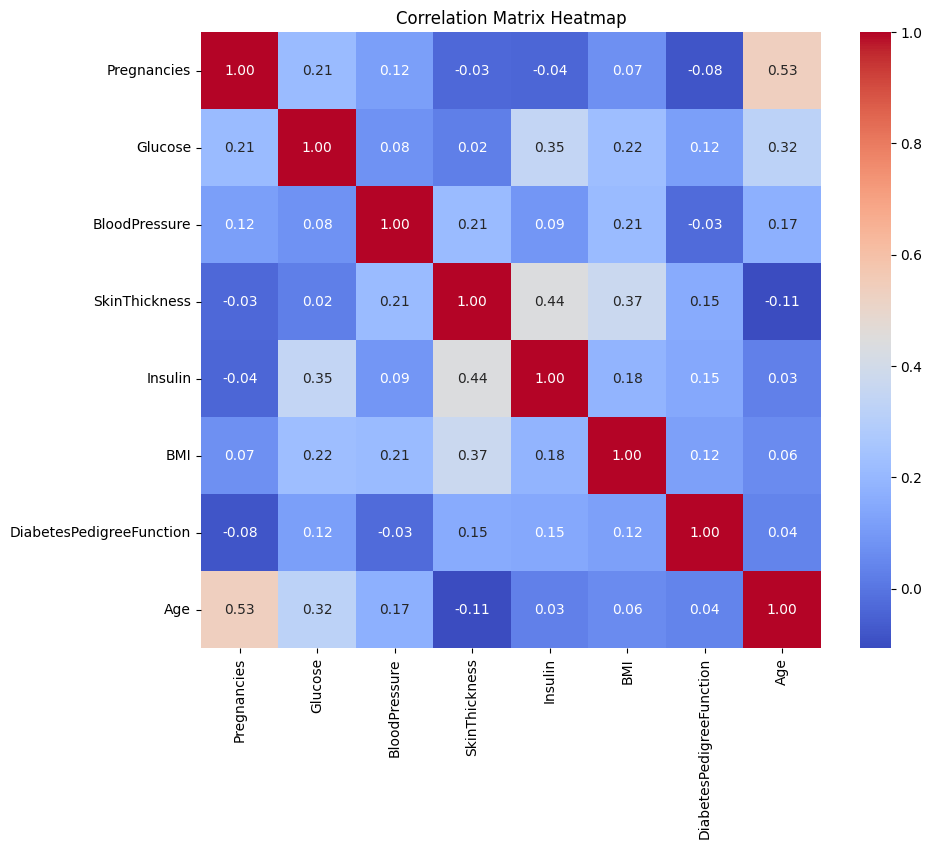

In [57]:
#TODO

corr = cov / varmat  # Normalize covariance matrix
print(corr)


#Plot the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=DiabetesDataTrain.columns[:-1], yticklabels=DiabetesDataTrain.columns[:-1])
plt.title("Correlation Matrix Heatmap")
plt.show()

From the heatmap read the following correlations. Also, answer the question below.

In [58]:
Corr1 = 0.0607  # Corr(BMI, Outcome)
Corr2 = 0.3248  # Corr(Glucose, Outcome)
Corr3 = 0.5335  # Corr(Pregnancies, Outcome)

bestcorr = ['Pregnancies', 'Outcome']


## Section 2

In this section we will train a logistic regression model on the diabetes dataset to predict the risk of diabetes given patient data. We will then use it to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implement a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (we'll need these to normalize the test data later).

In [59]:


def normalizeData(X, mean=np.array([]), std=np.array([])):
    """
    Normalizes each column of the data matrix X.

    If mean and std are provided, use them for normalization.
    Otherwise, compute mean and std from X.

    Parameters:
    X (numpy.ndarray): Data matrix (each column is a feature).
    mean (numpy.ndarray): Mean of each column (optional).
    std (numpy.ndarray): Standard deviation of each column (optional).

    Returns:
    normalized_X (numpy.ndarray): Normalized data matrix.
    mean (numpy.ndarray): Mean of each column.
    std (numpy.ndarray): Standard deviation of each column.
    """

    # If mean and std are not provided, compute them from X
    if mean.size == 0:
        mean = np.mean(X, axis=0)
    if std.size == 0:
        std = np.std(X, axis=0)

    # Normalize the dataset
    normalized_X = (X - mean) / std

    return normalized_X, mean, std


**Q5.** Sigmoid function and it's derivative.

1. Implement the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implement the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [60]:
#Sigmoid function
def sigmoid(t):

    #TODO

    sig = 1 / (1 + np.exp(-t))
    
    return sig

In [61]:
#Derivative of sigmoid function
def derivSigmoid(p):

    #TODO

    deriv_p = p * (1 - p)

    return deriv_p

**Q6.** Compute sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implement a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [62]:
def sigProg(X, w, b):
    """
    Computes the sigmoid probabilities for logistic regression.

    Parameters:
    X (numpy.ndarray): Data matrix of shape (n_samples, n_features).
    w (numpy.ndarray): Weight vector of shape (n_features,).
    b (float): Bias term.

    Returns:
    numpy.ndarray: Array of probabilities (n_samples,).
    """

    # Compute linear combination of inputs and weights
    z = np.dot(X, w) + b

    # Apply sigmoid function
    p = sigmoid(z)

    return p

**Q7.** Compute loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implement a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [63]:
def gradient(X, y, w, b, reg="none", Lambda=0.1):
    """
    Computes the gradient of the loss function for logistic regression.

    Parameters:
    X (numpy.ndarray): Data matrix of shape (n_samples, n_features).
    y (numpy.ndarray): True labels (n_samples,).
    w (numpy.ndarray): Weight vector (n_features,).
    b (float): Bias term.
    reg (str): Regularization type - "none", "ridge", or "lasso".
    Lambda (float): Regularization constant (default: 0.1).

    Returns:
    tuple: Gradient with respect to w (grad_w) and derivative with respect to b (deriv_b).
    """

    # Compute predictions
    p = sigProg(X, w, b)  # Get sigmoid probabilities

    # Compute derivative of sigmoid function
    deriv_p = derivSigmoid(p)

    # Compute error term
    error = (p - y) * deriv_p  # (n_samples,)

    # Compute gradients
    grad_w = (1 / X.shape[0]) * np.dot(X.T, error)  # (n_features,)
    deriv_b = (1 / X.shape[0]) * np.sum(error)  # Scalar

    # Apply regularization
    if reg == "ridge":
        grad_w += Lambda * w  # Ridge: L2 regularization
    elif reg == "lasso":
        grad_w += Lambda * np.sign(w)  # Lasso: L1 regularization

    return grad_w, deriv_b


**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implement the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [64]:
def grad_descent(grad_w, deriv_b, w, b, eta=0.01):
    """
    Performs a single step of gradient descent.

    Parameters:
    grad_w (numpy.ndarray): Gradient of the loss with respect to weights (n_features,).
    deriv_b (float): Derivative of the loss with respect to bias.
    w (numpy.ndarray): Current weight vector (n_features,).
    b (float): Current bias term.
    eta (float): Learning rate (default: 0.01).

    Returns:
    tuple: Updated weight vector w and bias b.
    """

    # Update weights and bias
    w = w - eta * grad_w
    b = b - eta * deriv_b

    return w, b


**Q9.** Train model

Implement the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def train(X_train, y_train, reg_type, Lambda, eta, max_iter=1000):
    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0

    loss_history = []
    weight_norm_history = []

    for i in range(max_iter):
        # Compute logits
        logits = np.dot(X_train, w) + b
        y_pred = 1 / (1 + np.exp(-logits))  # Sigmoid function
        
        # Compute loss (Binary Cross-Entropy)
        loss = -np.mean(y_train * np.log(y_pred + 1e-8) + (1 - y_train) * np.log(1 - y_pred + 1e-8))
        loss_history.append(loss)

        # Compute gradient
        dw = np.dot(X_train.T, (y_pred - y_train)) / n_samples
        db = np.mean(y_pred - y_train)

        # Apply regularization
        if reg_type == "ridge":
            dw += Lambda * w  # Ridge (L2)
        elif reg_type == "lasso":
            dw += Lambda * np.sign(w)  # Lasso (L1)

        # Update weights
        w -= eta * dw
        b -= eta * db

        # Track weight norm
        weight_norm_history.append(np.linalg.norm(w, 2))

    return w, b, loss_history, weight_norm_history


**Q10.** Predict using the model

Implement a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [89]:
def predict(X, w, b):
    """
    Predict binary labels (0 or 1) using a trained logistic regression model.

    Parameters:
    X (numpy.ndarray): Feature matrix (n_samples, n_features).
    w (numpy.ndarray): Trained weight vector.
    b (float): Trained bias.

    Returns:
    numpy.ndarray: Predicted labels (0 or 1).
    """

    # Compute sigmoid probabilities
    p = sigmoid(np.dot(X, w) + b)

    # Convert probabilities to binary predictions (threshold = 0.5)
    yhat = (p >= 0.5).astype(int)

    return yhat


**Q11.** Use the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

In [90]:
# Ensure X_test has the same columns as X_train
X_train = DiabetesDataTrain.iloc[:, :-1].values  # All features except Outcome
y_train = DiabetesDataTrain.iloc[:, -1].values   # Labels

# Identify feature columns for training
feature_columns = DiabetesDataTrain.columns[:-1]

# Select only matching columns from test data
X_test = DiabetesDataTest[feature_columns].values  # Ensure same features

# Normalize features using training data statistics
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Apply normalization
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std  # Now, X_test has correct shape

print(X_train.shape)  # Should match (399,8)
print(X_test.shape)   # Should match (100,8)


(399, 8)
(100, 8)


In [93]:
# Best hyperparameters found using cross-validation
best_eta = 0.01
best_Lambda = 0.1
best_reg = "ridge"

# Train the final model while collecting loss and weight norms
w, b, loss_history, weight_norm_history = train(X_train, y_train, best_reg, best_Lambda, best_eta, max_iter=1000)


# Predict on test data
y_pred_test = predict(X_test, w, b)

# Classification Error on Training Data
y_pred_train = predict(X_train, w, b)
train_error = np.mean(y_pred_train != y_train)

print(f"Training Classification Error: {train_error:.4f}")



Training Classification Error: 0.2556


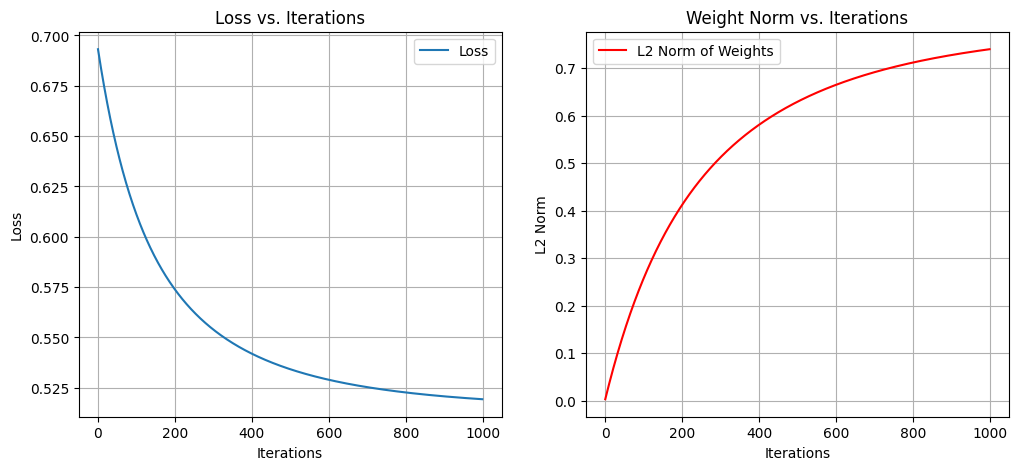

In [94]:

# Plot loss vs. iterations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs. Iterations")
plt.legend()
plt.grid()

# Plot weight norm vs. iterations
plt.subplot(1, 2, 2)
plt.plot(weight_norm_history, label="L2 Norm of Weights", color='r')
plt.xlabel("Iterations")
plt.ylabel("L2 Norm")
plt.title("Weight Norm vs. Iterations")
plt.legend()
plt.grid()

plt.show()


**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


In [99]:
#TODO

# Load Test Data
DiabetesTest = pd.read_csv("DiabetesTest.csv")

# Identify feature columns for training
feature_columns = DiabetesDataTrain.columns[:-1]

# Select only matching columns from test data
X_test = DiabetesDataTest[feature_columns].values  # Ensure same features


# Normalize Test Data using Training Mean & Std
X_test = (X_test - mean) / std  # `mean` and `std` are from training data

# Predict Outcomes using Trained Model
y_test_pred = predict(X_test, w, b)  # `w` and `b` are from trained model

# Output Result
print("Predictions for Test Data:", y_test_pred)

Predictions for Test Data: [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
